# Data Exploration - MLB Statcast Data
Justin Reising

## Introduction

Over the course of the past decade, analytics has become increasingly popular in Major League Baseball (MLB) among the ball clubs. Since the release of the film 'Moneyball' in 2011, the interest in the type of analytics possible to gather in the game has increased even more. The film takes place in 2002 revolving around the Oakland Athletics and their general manager Billy Beane. As the team's budget is stripped to a bare minimum by MLB standards, a new approach by the GM uses analytics to build a team to compete with the larger budget teams in their division as well as those around the league. To make a long story short, Oakland did make it to the division championship that year with a team composed of players that most seasoned scouts wouldn't have given a second look at. This began a revolution in the game that has since become more popular and more complex virtually every team in the MLB is deploying some sort of analytical approach to build their teams and evaluating their talent. 

Since 2006, MLB has been using additional metrics measured by state of the art tracking systems installed in every stadium called Statcast and PITCHf/x. Statcast and PITCHf/x are powered by cloud computing services provided by Amazon Web Services (AWS). The tracking technology records the incredibly precise data such as spin rate, velocity, spin direction, horizontal and vertical break, and location relative to the strike zone of a single pitch to name a few. Consequently, every game thousands of different data points recorded at every instance of game play. There are massive amounts data being analyzed simultaneously and analytics created to inform decisions from on the field, to the corporate office. Here, we will introduce a few techniques in exploring this type of data following a similar approach to that of the one used in the link below. Although, instead of classifying types of basketball players, we will investigate types of pitches. 

https://fastbreakdata.com/classifying-the-modern-nba-player-with-machine-learning-539da03bb824

### Data Aquisition
Colelcting the Statcast and Pitchf/x data can be done from any PC and through multiple platforms. Baseball Savant (https://baseballsavant.mlb.com/statcast_leaderboard) is one of the most visited sites by those that are interested in the Statcast data, and has a nice user interface for looking up certain data from the database. There are also other ways of scraping the data using programming packages in Python and R for immediate analysis. I have previously scraped data for multiple seasons using the (baseballR) package in R and subset the data in various ways. Here, we will be looking at some of the data points recorded for all pitches thrown on Mondays during the 2016 season.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import linalg

In [7]:
PitchData = pd.read_csv('mondayBaseball.csv')
PitchData.head()

,Unnamed: 0,gameString,gameDate,visitor,home,inning,side,balls,strikes,outs,...,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallType,battedBallAngle,battedBallDistance,paResult
0,1,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,0,0,...,2044.22,205.477,-0.374,2.933,-6.93,8.28,NaN,NaN,NaN,NaN
1,2,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,1,0,...,1966.32,220.143,0.342,3.223,-7.48,7.35,NaN,NaN,NaN,NaN
2,3,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,2,0,...,2127.17,198.816,0.389,2.266,-5.22,9.79,FB,27.78,323.03,IP_OUT
3,4,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,0,1,...,1947.11,198.734,-0.004,2.380,-7.24,8.40,NaN,NaN,NaN,NaN
4,5,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,1,1,...,1903.08,205.503,0.272,2.421,-6.79,9.37,NaN,NaN,NaN,NaN


In [4]:
PitchData.shape

(79931, 36)

Looking at the first 5 observations in the data set, we can see a many types of variables just at a glance. Although, the first 3 columns, 'Unnamed', 'game String', and 'gameDate' will not be very useful to us for this exploration of the pitch data so we are going to remove these for now and take a look at all of the other variables.

In [8]:
PitchData.drop(['Unnamed: 0', 'gameString', 'gameDate'], axis = 1, inplace = True)
PitchData.dtypes

visitor                object
home                   object
inning                  int64
side                   object
balls                   int64
strikes                 int64
outs                    int64
batterId                int64
batterName             object
batterHand             object
batterPosition         object
pitcherId               int64
pitcherName            object
pitcherHand            object
timesFaced              int64
catcherId               int64
catcher                object
umpireId                int64
umpire                 object
probCalledStrike      float64
pitchResult            object
pitchType              object
releaseVelocity       float64
spinRate              float64
spinDir               float64
locationHoriz         float64
locationVert          float64
movementHoriz         float64
movementVert          float64
battedBallType         object
battedBallAngle       float64
battedBallDistance    float64
paResult               object
dtype: obj

Now we are looking at a few different data types consisting integers, floats, and objects (character labels). These character string type variables can be very useful in looking at pitches grouped by pitcher, umpire, catcher, inning, count, outs, etc. All of the things recorded for situational analysis. We could begin to look into specific pitcher-hitter match-ups and so much more. For now, we are going to focus on pitches and the continuous data points that describe them. So we are going to separate the object variables from the floats.

In [10]:
FloatNames = []
IntNames = []
ObjectNames = []
for col in PitchData.columns:
    if PitchData.dtypes[col] == np.float64 :
        FloatNames.append(col)
    elif PitchData.dtypes[col] == np.int64 :
        IntNames.append(col)
    else:
        ObjectNames.append(col)
ObjectNames

['visitor',
 'home',
 'side',
 'batterName',
 'batterHand',
 'batterPosition',
 'pitcherName',
 'pitcherHand',
 'catcher',
 'umpire',
 'pitchResult',
 'pitchType',
 'battedBallType',
 'paResult']

In [11]:
IntNames

['inning',
 'balls',
 'strikes',
 'outs',
 'batterId',
 'pitcherId',
 'timesFaced',
 'catcherId',
 'umpireId']

In [12]:
PitchData_Float = PitchData[FloatNames]
PitchData_Float.head()

,probCalledStrike,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallAngle,battedBallDistance
0,0.975,94.2,2044.22,205.477,-0.374,2.933,-6.93,8.28,NaN,NaN
1,0.745,97.1,1966.32,220.143,0.342,3.223,-7.48,7.35,NaN,NaN
2,0.968,96.5,2127.17,198.816,0.389,2.266,-5.22,9.79,27.78,323.03
3,1.000,95.6,1947.11,198.734,-0.004,2.380,-7.24,8.40,NaN,NaN
4,1.000,95.6,1903.08,205.503,0.272,2.421,-6.79,9.37,NaN,NaN


Now that we have the continuous variables subset here, we notice here that for 'battedBallAngle' and 'battedBallDistance' we have a significant amount of 'NaN' in these columns. This makes sense because most pitches are not put in play by batters, and of the balls hit, an even smaller portion of those are actually hits in which the batter reaches base safely. Here is a breif description of the metrics for these variables:

**ProbCalledStrike**: (*Float*) Estimated probability that the umpire will call the pitch a strike, if the batter does not swing, based on TruMedia's model.

**ReleaseVelocity**: (*Float*) Pitch velocity (mph).

**SpinRate**: (*Float*) Pitch spin rate (rpm).

**SpinDir**: (*Float*) From the catcher's perspective, the angle (from 0 to 360) between the pole around which the ball is rotating and the positive x-axis.

**LocationHoriz**: (*Float*) Distance in feet from the horizontal center of the plate as the ball crosses the front plane of the plate, negative values are inside to right handed batters.

**LocationVert**: (*Float*) Height in feet above the ground as the ball crosses the front plane of the plate.

**HorizMovement**: (*Float*) The horizontal movement, in inches, of the pitch between the release point and home plate, as compared to a theoretical pitch thrown at the same speed with no spin-induced movement.

**VertMovement**: (*Float*) The vertical movement, in inches, of the pitch between the release point and home plate, as compared to a theoretical pitch thrown at the same speed with no spin-induced movement.

**battedBallAngle**:(*Float*) Angle in degrees of the batted ball, -45 is down the left field line, 45 is down the right field line.

**battedBallDistance**:(*Float*) Distance in feet from home plate to where the ball was fielded.

Now let's take look at some of the descriptive statistics for each of these variables.

## Data Exploration
Here, we will look at some of the traditional statistics for these data, as well as their distributions. First, let's consider the continuous pitch data.

In [13]:
PitchData_Float.describe()

,probCalledStrike,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallAngle,battedBallDistance
count,79921.000000,79931.000000,73734.000000,79620.000000,79931.000000,79931.000000,79931.000000,79931.000000,14499.000000,14499.000000
mean,0.471829,88.124128,2201.378164,182.118389,-0.021314,2.236719,-0.631383,4.943900,2.487668,204.409772
std,0.426118,6.033272,318.365005,62.942123,0.868630,0.939513,6.279931,5.261177,27.697504,101.883735
min,0.000000,43.100000,159.043000,0.009908,-4.494000,-2.907000,-17.110000,-16.210000,-176.380000,2.500000
25%,0.005000,84.100000,2062.022500,145.225000,-0.620000,1.640000,-5.990000,2.140000,-20.550000,117.770000
50%,0.424000,89.500000,2236.790000,195.501000,-0.013000,2.246000,-1.390000,6.020000,1.460000,212.680000
75%,0.951000,92.700000,2396.830000,222.405500,0.582000,2.844000,4.470000,8.860000,25.845000,280.645000
max,1.000000,105.000000,3472.370000,359.992000,3.970000,6.860000,20.420000,17.850000,178.210000,554.630000


A few things stick out for many baseball fans such as the average release velocity of 88 mph with a max of 105 as well as the max batted ball distance of 554 feet! These are some incredible data points when we consider the physiological limitations of players. Since we are looking at these data describing the pitches, we may expect to see some correlations between them. In fact, we see a moderate correlation of 0.71 between release velocity and vertival movement. Why might that be? Well it may just come down to the physics of the game. One can easily see that the fasted pitches thrown are fastballs for which there is little vertical movement and that curveballs, change-ups, and other off-speed pitches are thrown at lower velocities with spin that forces the ball to move in a downward manner. Similarly, horizontal movement and spin direction have a moderate correlation as well. These physical attributes are key components for the action of a pitch.

In [14]:
PitchData_Float.corr() 

,probCalledStrike,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallAngle,battedBallDistance
probCalledStrike,1.000000,0.082004,0.021672,0.029730,-0.043048,0.194990,-0.014018,0.089676,-0.002422,0.191035
releaseVelocity,0.082004,1.000000,0.086123,0.278235,-0.036297,0.242962,-0.277558,0.712762,0.041752,0.047378
spinRate,0.021672,0.086123,1.000000,-0.213230,0.087345,0.064847,0.128838,-0.074692,0.007800,0.035732
spinDir,0.029730,0.278235,-0.213230,1.000000,-0.196286,0.064894,-0.713838,0.294546,0.027982,0.005054
locationHoriz,-0.043048,-0.036297,0.087345,-0.196286,1.000000,-0.146401,0.164336,-0.004793,0.145253,0.007296
locationVert,0.194990,0.242962,0.064847,0.064894,-0.146401,1.000000,-0.041407,0.251993,0.026299,0.097574
movementHoriz,-0.014018,-0.277558,0.128838,-0.713838,0.164336,-0.041407,1.000000,-0.221297,-0.024747,-0.002307
movementVert,0.089676,0.712762,-0.074692,0.294546,-0.004793,0.251993,-0.221297,1.000000,0.031138,0.099023
battedBallAngle,-0.002422,0.041752,0.007800,0.027982,0.145253,0.026299,-0.024747,0.031138,1.000000,0.014238
battedBallDistance,0.191035,0.047378,0.035732,0.005054,0.007296,0.097574,-0.002307,0.099023,0.014238,1.000000


Taking a look at the histograms of these variables, we can see how the metrics are measured relate to the distributions. For example, batted ball angle, the distribution should look like a tall and skinny distribution. The two lower frequency bins on each end would be balls hit foul on either side of the foul line while most of the batted balls are between -45 and and 45. Similarly, for vertical movement, we may ask why this distribution is so skewed? Well, again this makes sense in the context of the game, in general, pitchers throw more fastballs than they do off-speed. To see a distribution where there are more positive vertical movement than negative (remember the way this metric is defined is based a theoretical 'line' from the release point in a vacuum) makes sense. 

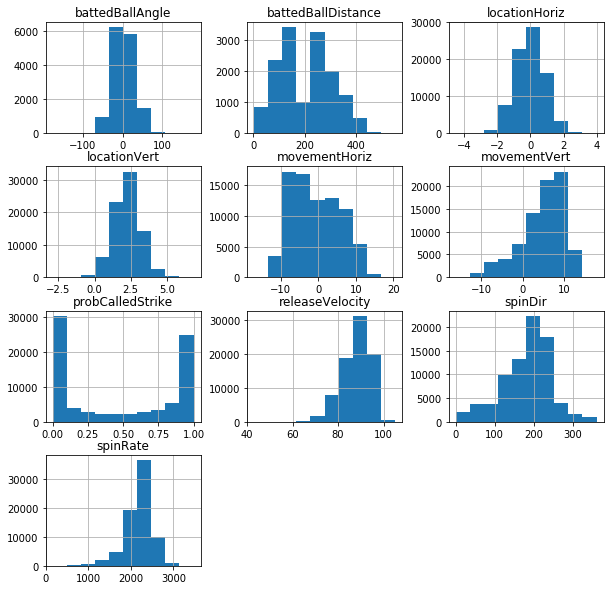

In [15]:
PitchData_Float.hist(figsize = (10,10));

With the correlation of vertical movement and release velocity, let's take a look at the scatter plot of these two variables. Below we can see the upward trend that as the vertical movement increases, release velocity increases with it. Again, this makes sense as we described above how fastballs tend to have higher vertical movement from the way it is defined. But we begin to ask, "What is going on with these points that seem to have fallen off from the majority of the pitches?" These are pitches that have little to nodownward movement (relative to the theoretical line) between 40 and 50 mph. 

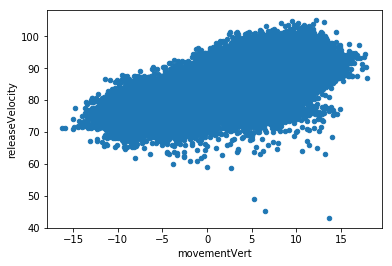

In [16]:
PitchData_Float.plot.scatter(x='movementVert', y='releaseVelocity');

Similarly, we can see these occurances of low velocity pitches with relatively high spin rates. So what exactly is going on here? Well baseball is a funny game where these variations are likely intentional by the pitchers that threw them. Further investigation may be need for these pitches, but two possibilities come to mind without going back to look up video from the games in which they occured to determine what exactly happened: 1) Eephus pitches - a pitch that a pitcher throws that is much slower than normal as a way to really get a hitter off balance. 2) Pitch outs - Since this data is from 2016, we note a significant rule change in MLB in 2017. The intentional walk rule was changed in 2017 to a 'no pitch' intentional walk rule. Prior to 2017, pitchers would have to throw intentional pitches far outside the strike zone 4 consecutive times to award a hitter a walk. This strategy is commonly used by managers in various situations. However, since 2017, pitchers no longer have to throw these intentional walk pitches. So, these slower velocity pitches could be associated with these types of scenerios. Further investigation with 2018 data may shed light on this.

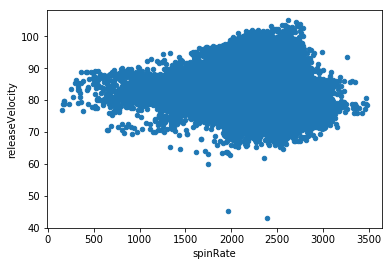

In [18]:
PitchData_Float.plot.scatter(x='spinRate', y='releaseVelocity');

What about our integer valued variables? Note that some of these are integer values while other are actually identifiers such as pitcherid, cathcerid, and umpireid. Below we can see in this subset data, the sum of the counts with balls and strikes. 

In [22]:
PitchData_Int = PitchData[IntNames]
PitchData_Int.head()

,inning,balls,strikes,outs,batterId,pitcherId,timesFaced,catcherId,umpireId
0,1,0,0,0,452655,503449,1,518960,427192
1,1,0,1,0,452655,503449,1,518960,427192
2,1,0,2,0,452655,503449,1,518960,427192
3,1,0,0,1,605412,503449,1,518960,427192
4,1,0,1,1,605412,503449,1,518960,427192


In [23]:
PitchData_Int.balls.value_counts()

0    36148
1    23931
2    13363
3     6489
Name: balls, dtype: int64

In [24]:
PitchData_Int.strikes.value_counts()

0    32491
1    24442
2    22998
Name: strikes, dtype: int64

What we are interested in here is looking at the number of unique hitters and pitchers, which we found that there are 729 unique batters and 611 unique pitchers. From here, we can go a number of different directions in our analysis, depending on what we are interested in. For now, let's take a look at grouping the pitch data by pitcher.

In [25]:
len( PitchData_Int.batterId.value_counts() )

729

In [26]:
len( PitchData_Int.pitcherId.value_counts() )

611

Now, let's look at something really neat with a short code. Grouping this data by pitcher and looking at the descriptive statistics for each variable. Note that the names for these pitcherid's can be retrieved as well, but for now we will just keep them in numerical format.

In [27]:
GroupedByPitchers_Float = PitchData_Float.groupby(PitchData_Int.pitcherId)
GroupedByPitchers_Float.describe()

probCalledStrike                                              \
                     count      mean       std    min      25%     50%   
pitcherId                                                                
112526               411.0  0.549450  0.426749  0.000  0.03500  0.6860   
276351               131.0  0.505710  0.428044  0.000  0.02200  0.5190   
276542               124.0  0.400847  0.425058  0.000  0.00000  0.1380   
279571                40.0  0.609150  0.421802  0.000  0.10475  0.8415   
282332               201.0  0.516050  0.427626  0.000  0.00700  0.6360   
285064               153.0  0.416471  0.426542  0.000  0.00000  0.2310   
285079               526.0  0.490338  0.427860  0.000  0.00625  0.4775   
407793               287.0  0.439655  0.433535  0.000  0.00000  0.2690   
407819                49.0  0.474878  0.430518  0.000  0.00600  0.4420   
407822               388.0  0.438376  0.429779  0.000  0.00000  0.3220   
407845               150.0  0.394660  0.409810  0.000  0.00000  0.2270   
407890               285.0  0.469554  0.422328  0.000  0.01100  0.4580   
407908                94.0  0.498862  0.423982  0.000  0.01650  0.4300   
408061               156.0  0.447321  0.436647  0.000  0.00000  0.3545   
408241               415.0  0.490448  0.439465  0.000  0.00450  0.5210   
424144                55.0  0.534018  0.418051  0.000  0.07500  0.6770   
425426                96.0  0.505615  0.422700  0.000  0.00675  0.6085   
425492               128.0  0.478891  0.426577  0.000  0.00975  0.3590   
425532                 6.0  0.635667  0.395949  0.144  0.33925  0.6765   
425626                55.0  0.488455  0.420385  0.000  0.00000  0.5170   
425657                29.0  0.568207  0.431899  0.000  0.05600  0.7810   
425794               398.0  0.495608  0.423088  0.000  0.01975  0.4830   
425844               393.0  0.443931  0.415556  0.000  0.00500  0.3530   
425856                84.0  0.387083  0.422247  0.000  0.00000  0.1525   
429400                 9.0  0.336333  0.438923  0.000  0.00000  0.0990   
429719               254.0  0.486736  0.424690  0.000  0.01625  0.4415   
429722               231.0  0.458732  0.431799  0.000  0.00000  0.3960   
429780                21.0  0.523429  0.420689  0.000  0.00000  0.6540   
430580                75.0  0.463533  0.440478  0.000  0.01000  0.3260   
430589                35.0  0.385457  0.431778  0.000  0.00000  0.0550   
...                    ...       ...       ...    ...      ...     ...   
623439                63.0  0.506381  0.425949  0.000  0.02900  0.5870   
624586                57.0  0.319351  0.385209  0.000  0.00000  0.0980   
625643                43.0  0.437930  0.458704  0.000  0.00000  0.0980   
628317               261.0  0.409602  0.408989  0.000  0.00000  0.2880   
628333                43.0  0.397209  0.427566  0.000  0.00000  0.1720   
628452               273.0  0.510828  0.420857  0.000  0.01200  0.5910   
628711               163.0  0.484393  0.421168  0.000  0.01950  0.5170   
640455               327.0  0.456899  0.420827  0.000  0.00500  0.3630   
640463               186.0  0.407000  0.421003  0.000  0.00050  0.1790   
641490                60.0  0.446983  0.427018  0.000  0.02375  0.2635   
641501                10.0  0.436500  0.376045  0.000  0.06600  0.4130   
641627                20.0  0.463200  0.438314  0.000  0.00800  0.5040   
641771               142.0  0.401387  0.426070  0.000  0.00000  0.1425   
642003               174.0  0.462609  0.439288  0.000  0.00000  0.3750   
642229                56.0  0.404464  0.448942  0.000  0.00000  0.0560   
642239                21.0  0.425381  0.445071  0.000  0.00000  0.1430   
643230               164.0  0.462646  0.432054  0.000  0.00000  0.4500   
643297                15.0  0.435000  0.392312  0.000  0.00950  0.4700   
643325                20.0  0.366500  0.447512  0.000  0.00000  0.0585   
643327               153.0  0.407830  0.433558  0.000  0.00000  0.1290   
643338        

There is a lot going on in the table above with many features to extract and look at. We can look at pitchers on an individual basis and compare them to the rest of the pitchers who pitched in the 2016 season. Agaain, not that this is just a subset of pitches thrown on Mondays in the 2016 MLB season, so there is possibility that there are pitchers who never threw on a Monday that would not be seen in this data set. We can also see these grouped pitchers and which indices in the data set are pitches thrown by them.

In [28]:
GroupedByPitchers_Float.groups

{112526: Int64Index([12744, 12745, 12746, 12747, 12748, 12749, 12750, 12751, 12752,
             12753,
             ...
             78242, 78243, 78244, 78245, 78246, 78247, 78248, 78249, 78250,
             78251],
            dtype='int64', length=411),
 276351: Int64Index([ 1413,  1414,  1415,  1416,  1417,  1418,  1419,  1420,  1421,
              1422,
             ...
             77798, 77799, 77800, 77801, 77802, 77803, 77804, 77805, 77806,
             77807],
            dtype='int64', length=131),
 276542: Int64Index([25982, 25983, 25984, 25985, 25986, 25987, 25988, 25989, 34753,
             34754,
             ...
             70522, 70523, 70524, 70525, 70526, 70527, 70528, 70529, 70530,
             70531],
            dtype='int64', length=124),
 279571: Int64Index([ 4583,  4584,  4585,  4586,  4587,  4588,  7193,  7194,  7195,
              7196,  7197,  7198,  7199,  7200,  7201,  7202, 57125, 57126,
             57127, 57128, 57129, 57130, 57131, 57132, 57133, 5713

With the way these groups are defined, we can look into the number of pitches thrown by each pitcher. In doing so, we may want to look at pitchers that have consistent appearances or at the very least, a minimum number of pitches. Pitcher with low total pitch counts can be a result of 'specialty pitchers', pitchers that only throw in key situtations or they could've had one appearance in which they were injured and unable to return for the season. Other possiblities include promotions and demotions between AAA and the MLB levels. September call ups can include pitchers whom have been performing well in the minor league system that are called up to the big leagues and make two appearances only throwing a total of 78 pitches. Would we consider this type of pitcher a true representative of the Major League Pitchers? It may depend on the type of analysis we are doing, but in general, we may want to exclude these types of players. So let's look at how we may count these pitches.

In [29]:
NumPitches = [len(group) for group in GroupedByPitchers_Float.groups.values()]
NumPitches.sort(reverse = True)
NumPitches[:10]

[614, 595, 590, 582, 580, 579, 526, 524, 519, 515]

Above we can see the top 10 number fo pitches thrown. So lets look at where the cut-off is for 95% of pitchers when it comes to how many pitches they throw in total.

In [30]:
np.searchsorted(  np.cumsum(NumPitches)/np.sum(NumPitches), 0.95)

457

In [31]:
NumPitches[457] #Min pitch count possibility

46

So the 95th percentile of minimum pitches is approximately 46 pitches, which we may consider to be a minimum pitch count if we are comparing pitchers for example. We could use other parameters to set for comparison analyses, but for now we are jsut demonstrating. Now, let us consider a particular pitcher, and for demonstration purposes, we will pick one at random.

## Investigating A Single Pitcher

In [32]:
APitcher_Float = GroupedByPitchers_Float.get_group(407908)  #Just picked one
APitcher_Float.describe()

,probCalledStrike,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallAngle,battedBallDistance
count,94.000000,94.000000,86.000000,94.000000,94.000000,94.000000,94.000000,94.000000,12.000000,12.000000
mean,0.498862,85.070213,2052.438070,182.011267,0.110021,2.265915,-3.641170,4.987234,-18.586667,218.505833
std,0.423982,5.392205,589.651119,53.576805,0.758105,0.984027,4.100215,5.678924,38.514896,105.708188
min,0.000000,76.400000,933.884000,23.872400,-1.773000,-0.148000,-9.300000,-7.320000,-112.540000,18.320000
25%,0.016500,80.125000,1320.470000,193.797000,-0.327750,1.672000,-6.320000,2.480000,-32.622500,147.537500
50%,0.430000,86.150000,2389.325000,199.037000,0.260500,2.334500,-5.115000,6.560000,-22.300000,245.060000
75%,0.967500,90.300000,2468.067500,212.984250,0.639000,2.918750,-2.607500,9.410000,2.710000,273.517500
max,1.000000,92.300000,2677.870000,233.967000,1.545000,4.655000,6.060000,12.380000,32.950000,412.640000


In [33]:
APitcher_Float.corr()

,probCalledStrike,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallAngle,battedBallDistance
probCalledStrike,1.000000,-0.058370,0.112287,-0.154659,-0.064984,0.196037,0.120993,-0.141914,0.346438,0.363628
releaseVelocity,-0.058370,1.000000,0.531856,0.468669,0.166718,0.273896,-0.452585,0.842846,0.390963,-0.002096
spinRate,0.112287,0.531856,1.000000,-0.505930,0.050902,0.496698,0.538549,0.111414,0.484328,0.390259
spinDir,-0.154659,0.468669,-0.505930,1.000000,0.140599,-0.159829,-0.880064,0.720508,-0.095188,-0.212101
locationHoriz,-0.064984,0.166718,0.050902,0.140599,1.000000,-0.228869,-0.257652,0.210850,0.101695,-0.158489
locationVert,0.196037,0.273896,0.496698,-0.159829,-0.228869,1.000000,0.250870,0.096031,0.445807,0.198399
movementHoriz,0.120993,-0.452585,0.538549,-0.880064,-0.257652,0.250870,1.000000,-0.723563,0.234815,0.220321
movementVert,-0.141914,0.842846,0.111414,0.720508,0.210850,0.096031,-0.723563,1.000000,-0.131949,-0.448109
battedBallAngle,0.346438,0.390963,0.484328,-0.095188,0.101695,0.445807,0.234815,-0.131949,1.000000,0.553263
battedBallDistance,0.363628,-0.002096,0.390259,-0.212101,-0.158489,0.198399,0.220321,-0.448109,0.553263,1.000000


In [34]:
APitcher_Float.corr()['releaseVelocity']

probCalledStrike     -0.058370
releaseVelocity       1.000000
spinRate              0.531856
spinDir               0.468669
locationHoriz         0.166718
locationVert          0.273896
movementHoriz        -0.452585
movementVert          0.842846
battedBallAngle       0.390963
battedBallDistance   -0.002096
Name: releaseVelocity, dtype: float64

Note that the correlations between some of the variables seem to be higher than when we looked at the entire data set. Again, this makes sense. Pitchers are very habitual in just about everything they do, especially when it comes to their pitches. Note the higher correlation between release velocity and vertical movement. So, now let's look at the distributions of these variables for this pitcher compared to the rest of the league.

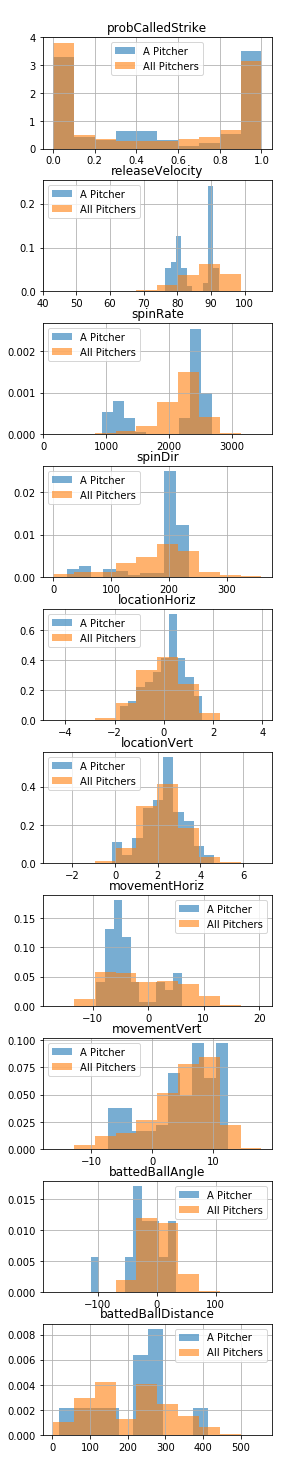

In [35]:
m = len(APitcher_Float.columns)

fig, axs = plt.subplots(m, 1, figsize = (4,m*2) )
plt.tight_layout()
i = 0
for col in APitcher_Float.columns:
    APitcher_Float[col].hist( alpha = 0.6, ax = axs[i], density = True, label = "A Pitcher");
    PitchData_Float[col].hist(alpha = 0.6, ax = axs[i], density = True, label = "All Pitchers");
    axs[i].set_title(" \n%s" % col)
    axs[i].legend()
    i+= 1

There's a lot to look at here but one plot that I want to point out is the Horizontal Movement histogram. Horizontal movement has a spike left of center compared to the rest of the league. This pitcher is former right-handed pitcher Joel Peralta while he pitched for the Seattle Mariners. This spike left of center could indicate the type of movement one could expect from his offspeed pitches. For him in particular, his go-to strikeout pitch is a split-finger fastball which typically moves in a down and in manner for a right-handed hitter. With a little knowledge about a pitcher's arsenal of pitches and some data, we can really begin to disect a pitcher and possibly spot an incline or decline in their pitch effectiveness in some instances.

## Some More Data Cleaning
Now we are going to look at this data set in more detail, but we need to clean it up. For now, we are going to look at release velocity in more setail, so we need to get rid of some other variables like identifiers other than pitcherid. Suppose we want to look at some of the integer data values with our continuous variables. 

In [38]:
PitchData_noIDs = PitchData_Int.drop([col for col in PitchData_Int.columns if col[-2:] == 'Id' and col[0] != 'p'], axis = 1)
PitchData_noIDs.head()

,inning,balls,strikes,outs,pitcherId,timesFaced
0,1,0,0,0,503449,1
1,1,0,1,0,503449,1
2,1,0,2,0,503449,1
3,1,0,0,1,503449,1
4,1,0,1,1,503449,1


In [39]:
PitchData_Num = pd.concat( [PitchData_Float,PitchData_noIDs], axis = 1)
PitchData_Num.head()

,probCalledStrike,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallAngle,battedBallDistance,inning,balls,strikes,outs,pitcherId,timesFaced
0,0.975,94.2,2044.22,205.477,-0.374,2.933,-6.93,8.28,NaN,NaN,1,0,0,0,503449,1
1,0.745,97.1,1966.32,220.143,0.342,3.223,-7.48,7.35,NaN,NaN,1,0,1,0,503449,1
2,0.968,96.5,2127.17,198.816,0.389,2.266,-5.22,9.79,27.78,323.03,1,0,2,0,503449,1
3,1.000,95.6,1947.11,198.734,-0.004,2.380,-7.24,8.40,NaN,NaN,1,0,0,1,503449,1
4,1.000,95.6,1903.08,205.503,0.272,2.421,-6.79,9.37,NaN,NaN,1,0,1,1,503449,1


Recall how many 'NaN' values we encounter when we consider the batted ball variables. Since we are primarily investigating the pitch attributes themselves, we are not very concerned about batted ball metrics for the time being, so we will remove these for now.

In [40]:
PitchData_Num.drop(['battedBallAngle','battedBallDistance'], axis = 1, inplace=True)

In [41]:
PitchData_Num.dropna(inplace = True)  ## For now -- deal with this later.. 
PitchData_Num.head() 

,probCalledStrike,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,inning,balls,strikes,outs,pitcherId,timesFaced
0,0.975,94.2,2044.22,205.477,-0.374,2.933,-6.93,8.28,1,0,0,0,503449,1
1,0.745,97.1,1966.32,220.143,0.342,3.223,-7.48,7.35,1,0,1,0,503449,1
2,0.968,96.5,2127.17,198.816,0.389,2.266,-5.22,9.79,1,0,2,0,503449,1
3,1.000,95.6,1947.11,198.734,-0.004,2.380,-7.24,8.40,1,0,0,1,503449,1
4,1.000,95.6,1903.08,205.503,0.272,2.421,-6.79,9.37,1,0,1,1,503449,1


Now let us break our data up a bit more, but we are going to retain the pitcher id and release velocity in a separate vectors. 

In [42]:
PitcherIds = PitchData_Num.pitcherId
ReleaseVelocities = PitchData_Num.releaseVelocity

PitchData_Num.drop( ['pitcherId','releaseVelocity'], axis = 1, inplace = True)
PitchData_Num.head()

,probCalledStrike,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,inning,balls,strikes,outs,timesFaced
0,0.975,2044.22,205.477,-0.374,2.933,-6.93,8.28,1,0,0,0,1
1,0.745,1966.32,220.143,0.342,3.223,-7.48,7.35,1,0,1,0,1
2,0.968,2127.17,198.816,0.389,2.266,-5.22,9.79,1,0,2,0,1
3,1.000,1947.11,198.734,-0.004,2.380,-7.24,8.40,1,0,0,1,1
4,1.000,1903.08,205.503,0.272,2.421,-6.79,9.37,1,0,1,1,1


In [37]:
PitchData_Num.describe()

,probCalledStrike,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,inning,balls,strikes,outs,timesFaced
count,73725.000000,73725.000000,73725.000000,73725.000000,73725.000000,73725.000000,73725.000000,73725.000000,73725.000000,73725.000000,73725.000000,73725.000000
mean,0.477232,2201.361472,183.791068,-0.036443,2.269547,-0.793265,5.249845,4.956623,0.882930,0.868037,0.977565,1.571977
std,0.425423,318.361927,61.323875,0.863645,0.926718,6.397581,5.250545,2.638084,0.968598,0.821810,0.814047,0.784228
min,0.000000,159.043000,0.009908,-4.494000,-2.543000,-16.210000,-16.210000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007000,2062.030000,148.780000,-0.633000,1.678000,-6.210000,2.830000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.445000,2236.780000,196.977000,-0.030000,2.274000,-1.910000,6.390000,5.000000,1.000000,1.000000,1.000000,1.000000
75%,0.952000,2396.820000,222.626000,0.565000,2.867000,4.550000,9.040000,7.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,3472.370000,359.992000,3.970000,6.747000,20.420000,17.850000,14.000000,3.000000,2.000000,2.000000,4.000000


Looking at the description of the reduced data set, we can see that we now have complete cases for 73,725 pitches. Now we are going to employ the Singular Value Decomposition to this dataframe.

## $$ \textbf{A} = \textbf{U} \Sigma \textbf{V}^{T} $$

This is a method to approach dimensionality reduction in our pitch data. What we would be like to be able to do is describe this data in a such a way that we can visually see differences in pitches that scatterplots simply cannot achieve. To this end, SVD and Princiapl Components Analysis (PCA) give us a way to discriminate pitches by means of Principal Axes and Principal Components. From the SVD approach, the columns of $\textbf{V}$ are our princiapl axes and the columns of $\textbf{U}\Sigma are our principal components.

In [43]:
%time U,Sigma, Vt = np.linalg.svd(PitchData_Num.values, full_matrices = False )

Wall time: 1.22 s


We are really interested in our Singular Values of 'Sigma' as they give us information about the variation in our data explained by the principal components.

In [39]:
Sigma

array([6.05920330e+05, 1.94266712e+04, 1.36735287e+03, 1.27473995e+03,
       7.24502532e+02, 2.91960316e+02, 2.58819266e+02, 2.29662500e+02,
       2.18071658e+02, 2.10549547e+02, 1.87732261e+02, 1.09742493e+02])

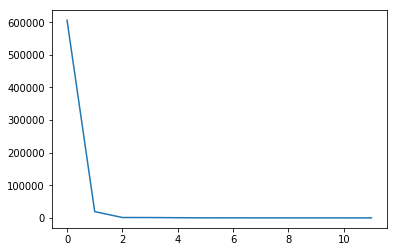

In [40]:
plt.plot(Sigma)

In the plot above we can see that the first two principal components are orders of magnitude larger than the rest. Furthermore, by calculating the cumulative sum of each singular value as a percentage of the toal sum, we can see that the first two singular values explain 99.2% of the variation. 

In [41]:
np.cumsum(Sigma)/np.sum(Sigma)  #First two pc's explain 99.2% of variance

array([0.96144235, 0.99226757, 0.99443721, 0.9964599 , 0.99760951,
       0.99807277, 0.99848345, 0.99884787, 0.99919389, 0.99952798,
       0.99982587, 1.        ])

Now recall our release velocities... Remeber those pitches that we saw in the scatter plots in the 40 and 50 range? Well for now, we are going to re-assign these values with a new minimum as we are getting ready to make a heat map with our release velocities based on our computed pirncipal components. The reason for this is that we don't want to have a range of values for release velocity that is too wide since there are only a handful of these outliers within our data set that may require more investigation.

In [44]:
ReleaseVelocities[ ReleaseVelocities < 60]

52914    43.1
56690    45.3
Name: releaseVelocity, dtype: float64

In [45]:
# QUICK FIX (while just exploring):  Set min to 60 so heatmap is more revealing
# Actual approach would be to nonlinearly transform color range 
ReleaseVelocities.loc[52914] = 60
ReleaseVelocities.loc[56690] = 60 

C:\Users\jreis\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


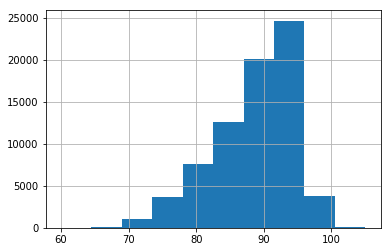

In [46]:
ReleaseVelocities.hist()

Can we predict release velocities using this data?  Sure -- but better question:  

"What is the information structure of the data -- including individually by pitcher -- that predicts what the release velocity of a pitch is going to be?"  

Exploring here -- not trying to make conclusions this semester.  Just trying to get to know what is in the data and what types of analytics are possible (analytic = actionable information that is self-contained and compact). 

So how did I produce CMPS? 

In [ ]:
ReleaseVelocities.describe()  # Quick Fix => small change only

Below is the heatmap code (sans the key line for CMPS ).  

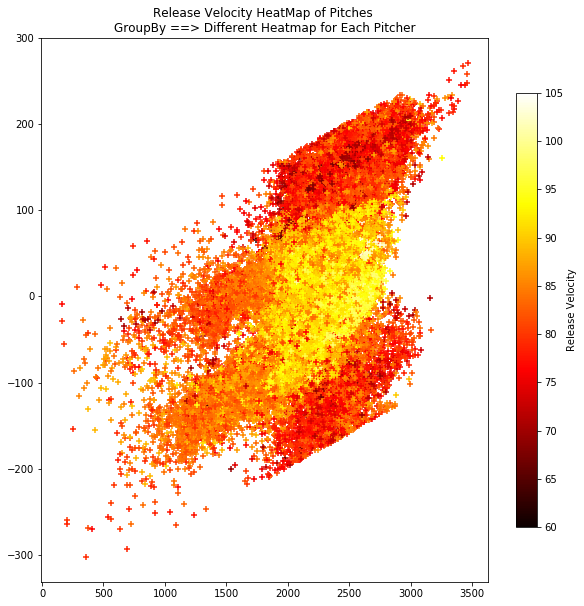

In [56]:
plt.subplots(figsize = (10,10))
cm = plt.get_cmap('hot')
CMPS = U @ np.diag(Sigma)

Qnt = plt.scatter(CMPS[:,0], CMPS[:,1], marker = '+' , c = ReleaseVelocities.values, cmap = cm )  
plt.title('Release Velocity HeatMap of Pitches \nGroupBy ==> Different Heatmap for Each Pitcher')
cbar = plt.colorbar( Qnt, shrink = 0.8 )
cbar.set_label('Release Velocity')#, rotation=270)

## Conclusion
In the plot above we are able to see separation between pitches of various release velocities. For example, the pitches that tend to be 90mph and higher are clearly grouped in the center of this heat map. While in the 70 to 80mph range, we can see two clear distinctions in this range. I hypothesis that this range is split into two because fo off-speed pitches that break in opposite directions like that of a curveball thrown from a right-hander as oppose to a left-hander. So we still have some work to do to get some actionable information from this. But in part 2 of this exploration, I will investigate certain pitchers and pitch types to see if this separation follows our hypothesis.

And here is the heat map the code produces (once CMPS is defined). Notice there are 5 natural clusters -- hence, probably 5 classes of pitchers.  Good working assumption.    

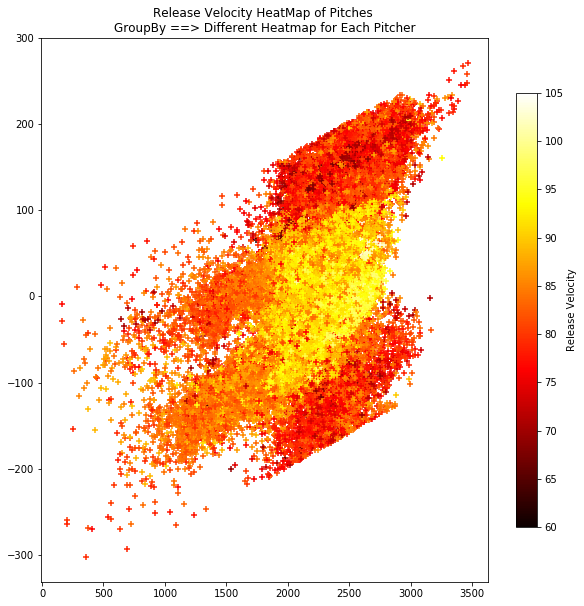